In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')


ruta_limpia = '../data/MX_videos_limpio.csv'
df = pd.read_csv(ruta_limpia)

df['trending_date'] = pd.to_datetime(df['trending_date'])
df['publish_date'] = pd.to_datetime(df['publish_date'])

print("Dataset listo para visualización.")

Dataset listo para visualización.


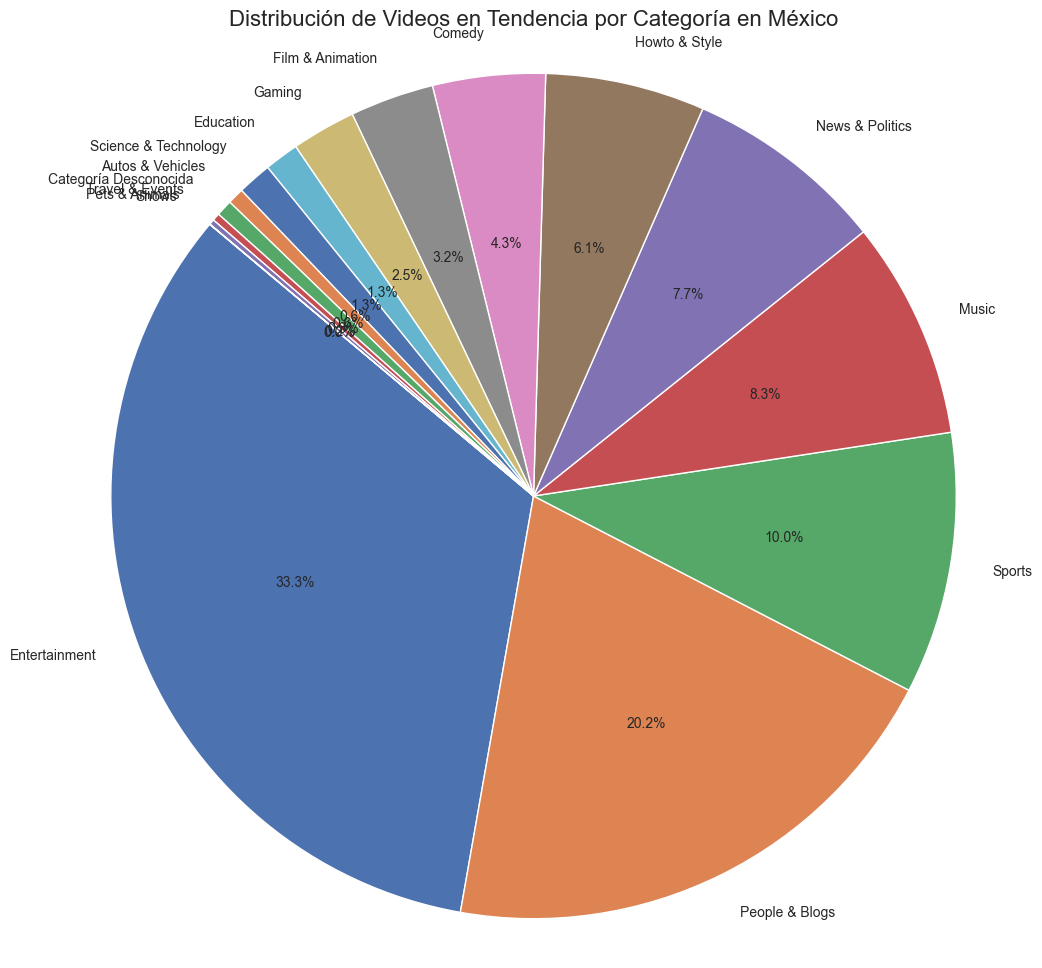

In [2]:
category_counts = df['category_name'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('Distribución de Videos en Tendencia por Categoría en México', fontsize=16)
plt.ylabel('') 
plt.axis('equal')  
plt.show()

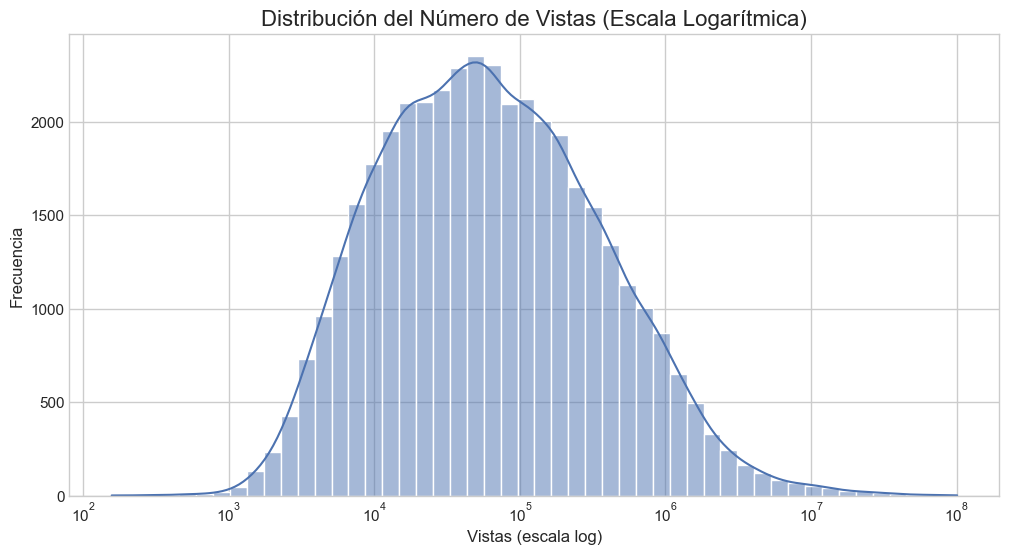

In [3]:
plt.figure(figsize=(12, 6))
sns.histplot(df['views'], bins=50, kde=True, log_scale=True)
plt.title('Distribución del Número de Vistas (Escala Logarítmica)', fontsize=16)
plt.xlabel('Vistas (escala log)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

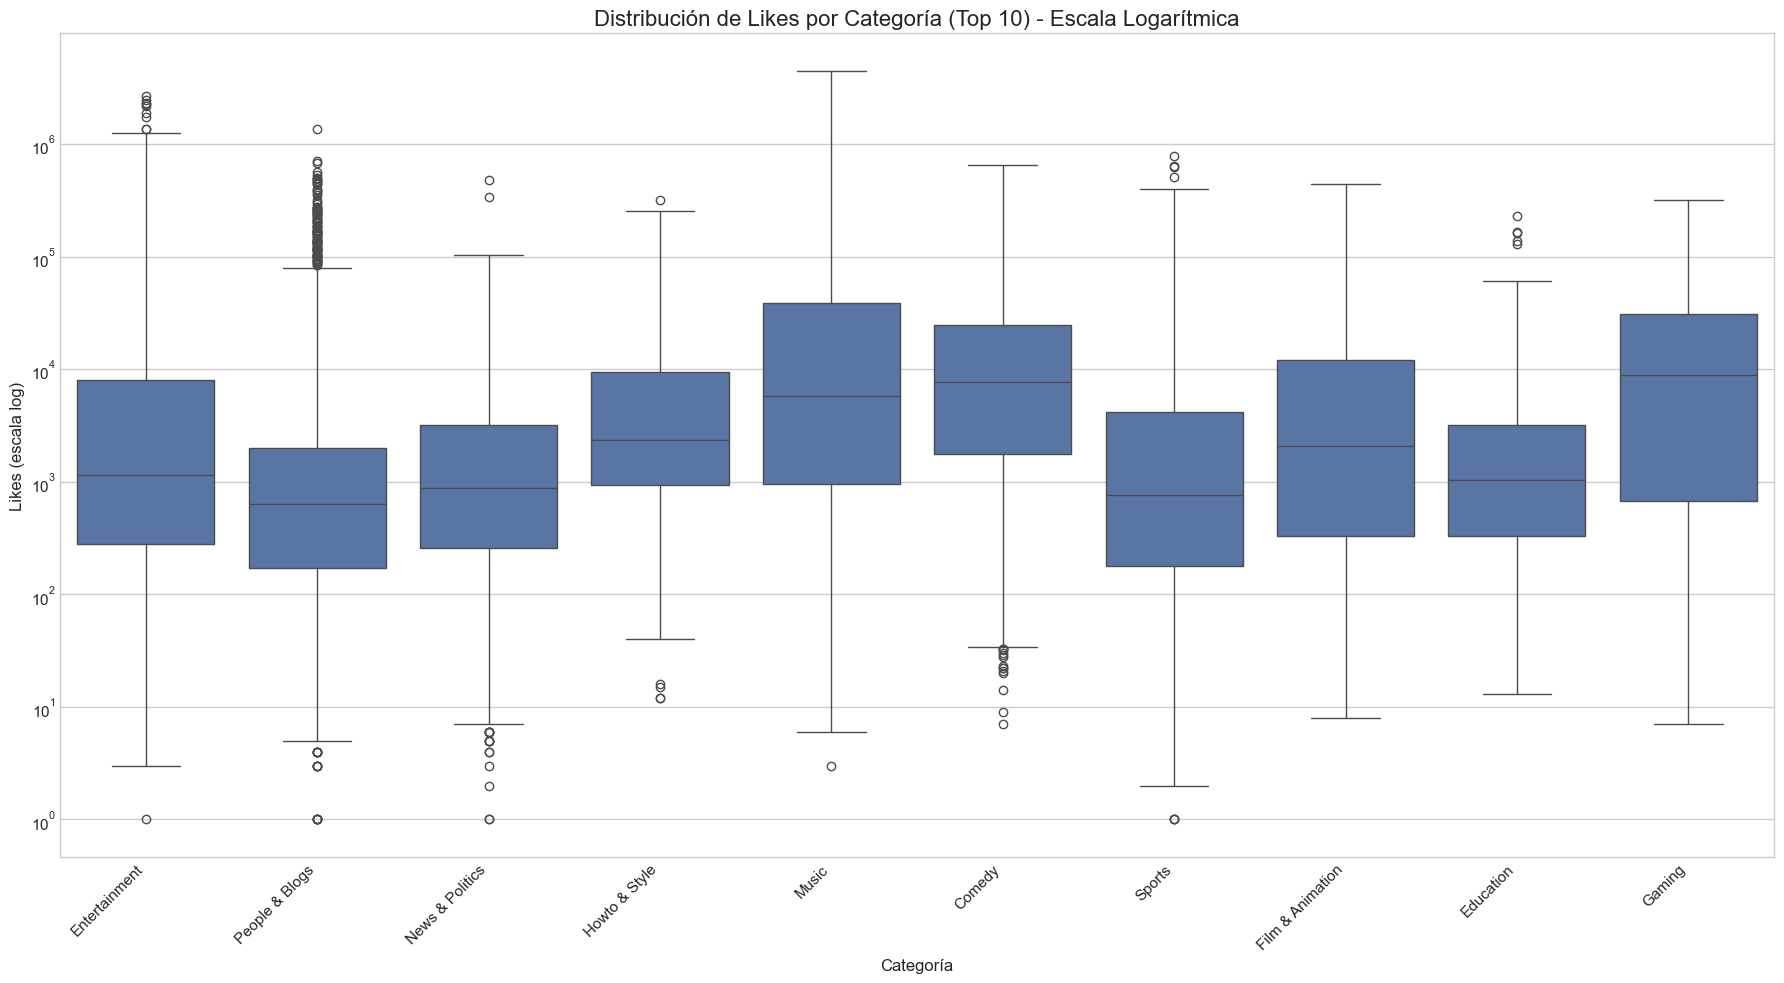

In [5]:
top_categories = df['category_name'].value_counts().nlargest(10).index

df_top_categories = df[df['category_name'].isin(top_categories)]

plt.figure(figsize=(18, 10))
sns.boxplot(data=df_top_categories, x='category_name', y='likes', log_scale=True)
plt.title('Distribución de Likes por Categoría (Top 10) - Escala Logarítmica', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Likes (escala log)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

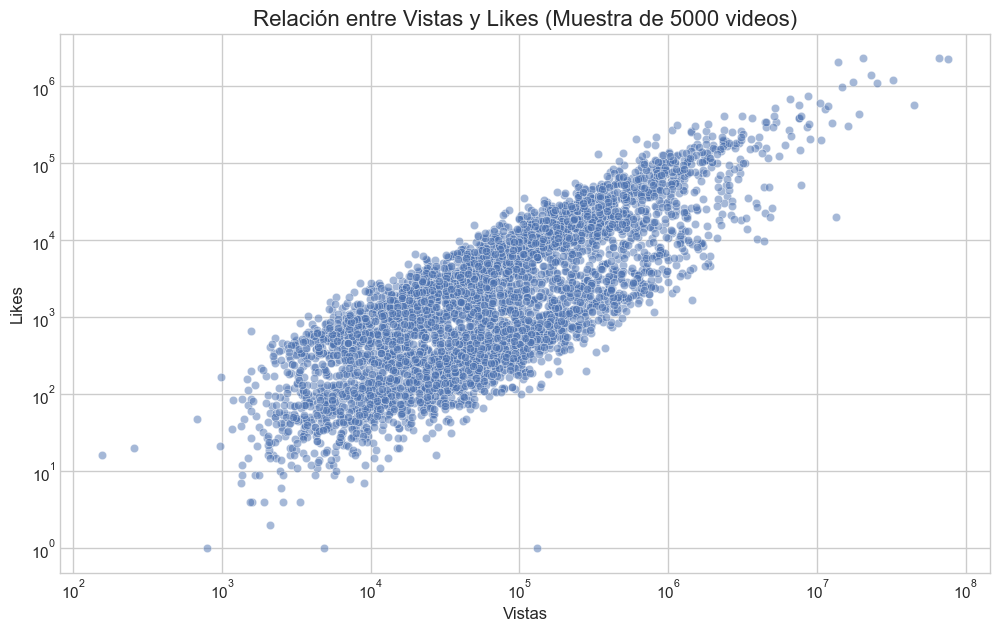

In [6]:
df_sample = df.sample(n=5000, random_state=42)

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_sample, x='views', y='likes', alpha=0.5)
plt.title('Relación entre Vistas y Likes (Muestra de 5000 videos)', fontsize=16)
plt.xlabel('Vistas', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.show()

c:\Users\frank\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\frank\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\frank\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


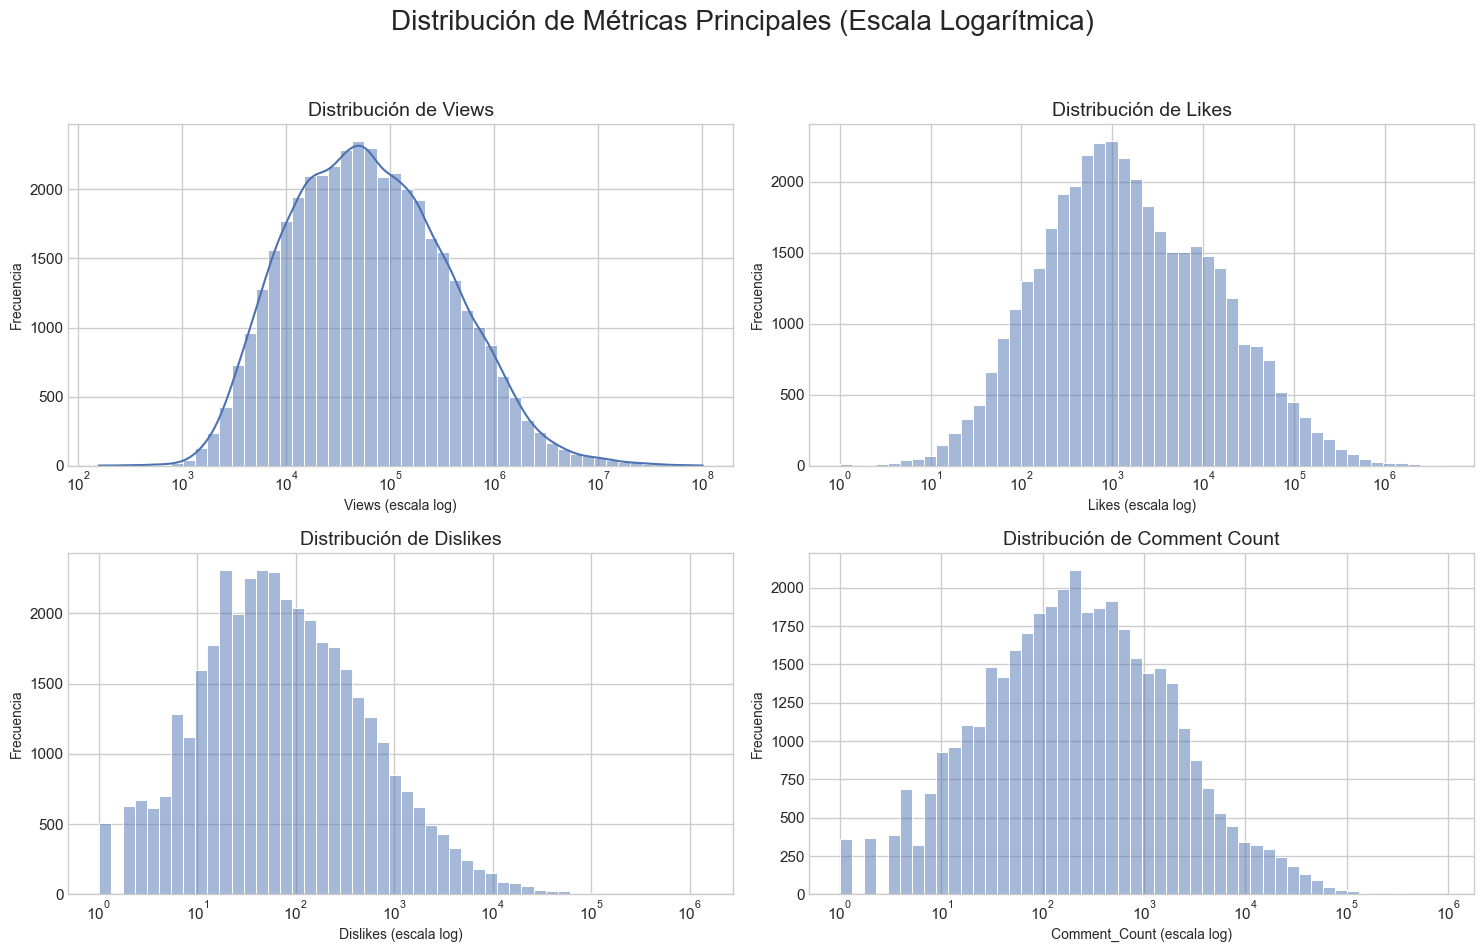

In [ ]:
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Métricas Principales (Escala Logarítmica)', fontsize=20)

axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, log_scale=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel(f'{col.title()} (escala log)', fontsize=10)
    axes[i].set_ylabel('Frecuencia', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()